# Определение стоимости автомобилей

## Загрузка библиотек. Знакомство с данными

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# считываем датафрейм
try:
    df=pd.read_csv('C:\\\\Python\\\\ЯП\\\\проект_8\\\\autos.csv', sep=',')

except:
    df=pd.read_csv('/datasets/autos.csv', sep=',')


In [4]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Переименуем столбцы

In [5]:
df=df.rename(columns={
    'DateCrawled':'date_crawled',
    'Price':'price',
    'VehicleType':'vehicle_type',
    'RegistrationYear':'registration_year',
    'Gearbox':'gearbox',
    'Power':'power',
    'Model':'model',
    'Kilometer':'kilometer',
    'RegistrationMonth':'registration_month',
    'FuelType':'fuel_type',
    'Brand':'brand',
    'NotRepaired':'not_repaired',
    'DateCreated':'date_created',
    'NumberOfPictures':'number_of_pictures',
    'PostalCode':'postal_code',
    'LastSeen':'last_seen'
    })

df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


#### Посмотрим на колонку - кол-во фотографий

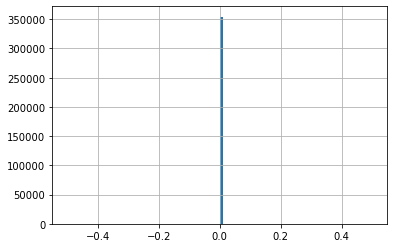

In [6]:
df.number_of_pictures.hist(bins = 100);

помоему там только нули...

In [7]:
#посмотрим на уникальные значения столбца number_of_pictures
df['number_of_pictures'].unique()

array([0], dtype=int64)

Так как кроме нулей в этом столбце значений нет, то он бесполезен и мы его удалим!

In [8]:
df = df.drop(['number_of_pictures'], axis=1)

Посмотрим на тип данных каждого из столбцов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  postal_code         354369 non-null  int64 
 14  last_seen           354369 non-null  object
dtypes: int64(6), object(9)
memory usage: 40.6+ MB


Посмотрим на пропуски данных

In [10]:
df.isnull().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
date_created              0
postal_code               0
last_seen                 0
dtype: int64

пропуски есть в 5 столбцах

Посмотрим на уникальные значения содержащиеся в этих колонках с пропусками

#### Столбец vehicle_type - тип автомобильного кузова

In [11]:
df.vehicle_type.unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

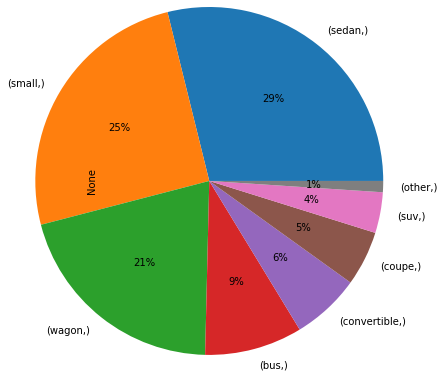

In [12]:
df[['vehicle_type']].value_counts().plot.pie(radius=2, autopct='%1.0f%%');

#### Столбец gearbox -  тип коробки передач

In [13]:
df.gearbox.unique()

array(['manual', 'auto', nan], dtype=object)

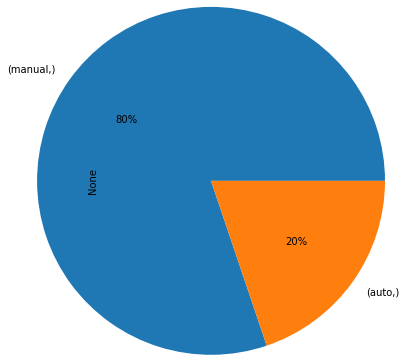

In [14]:
df[['gearbox']].value_counts().plot.pie(radius=2, autopct='%1.0f%%');

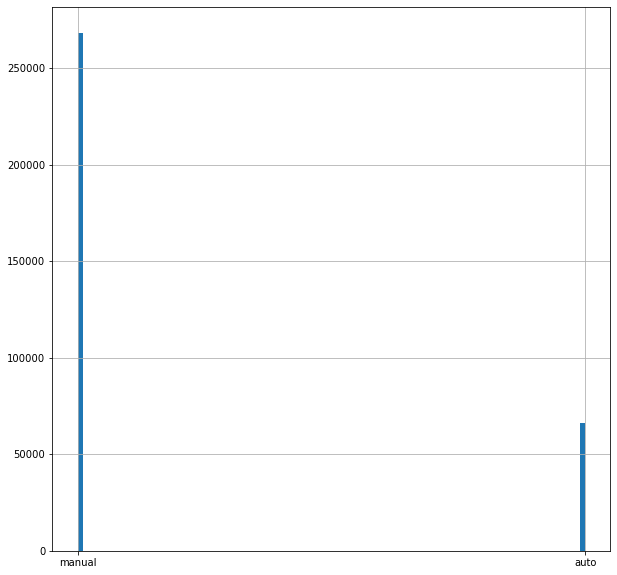

In [15]:
df.gearbox.hist(bins=100, figsize=(10,10));

#### Столбец brand -  марка

In [16]:
df.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

#### Столбец model -  модель

In [17]:
df.model.unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

#### Столбец fuel_type -  тип топлива

In [18]:
df.fuel_type.unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [19]:
tab_fuel_type = df['fuel_type'].value_counts()
tab_fuel_type

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

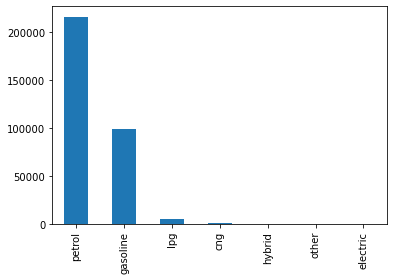

In [20]:
tab_fuel_type.plot(kind='bar');

#### Столбец not_repaired -  сведенья о ремонте

In [21]:
df.not_repaired.unique()

array([nan, 'yes', 'no'], dtype=object)

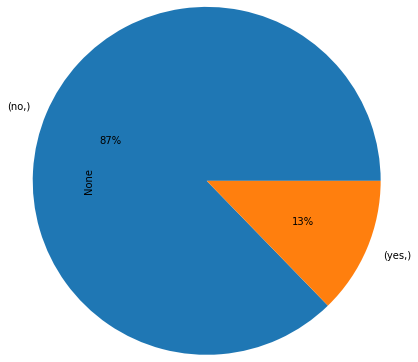

In [22]:
df[['not_repaired']].value_counts().plot.pie(radius=2, autopct='%1.0f%%');

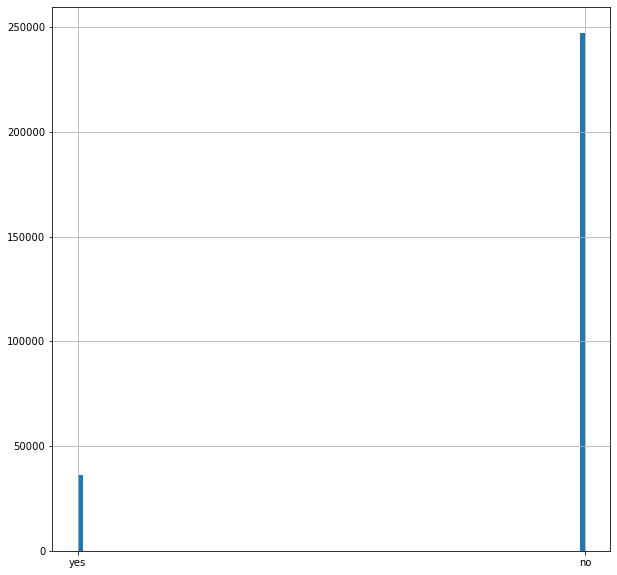

In [23]:
df.not_repaired.hist(bins=100, figsize=(10,10));

#### Посмотрим на года регистрации авто

In [24]:
df.registration_year.sort_values().value_counts()

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
3200        1
1920        1
1919        1
1915        1
8455        1
Name: registration_year, Length: 151, dtype: int64

Тут явные ошибки: 1253 год и 8455 год и тому подобное

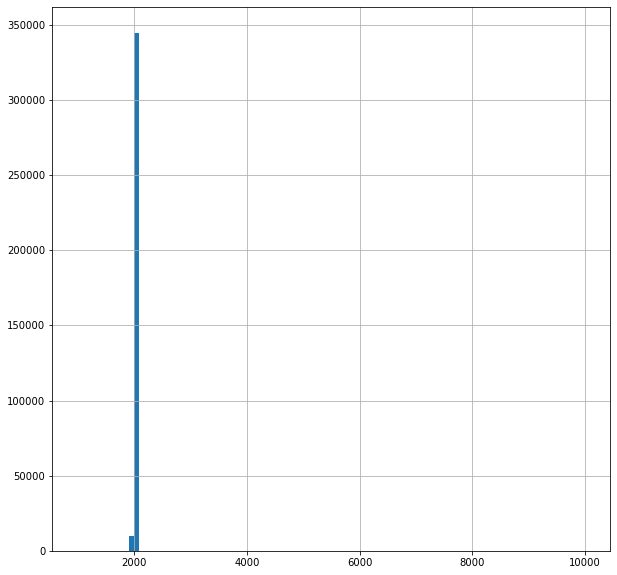

In [25]:
df.registration_year.hist(bins=100, figsize=(10,10));

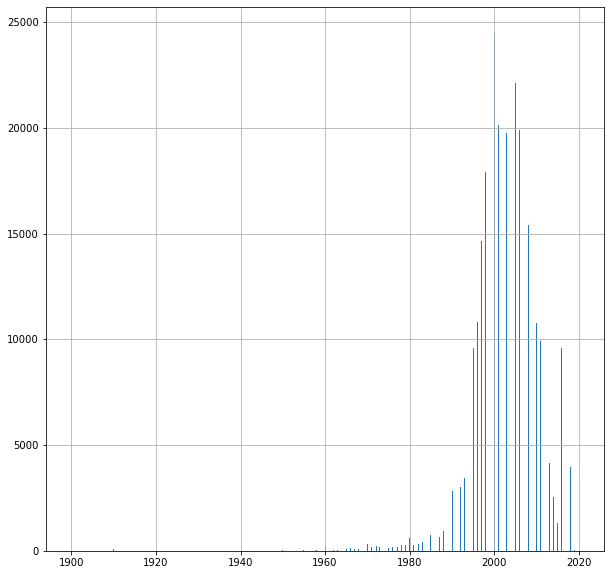

In [26]:
df.registration_year.hist(bins = 700, figsize=(10,10),range=(1900,2020));

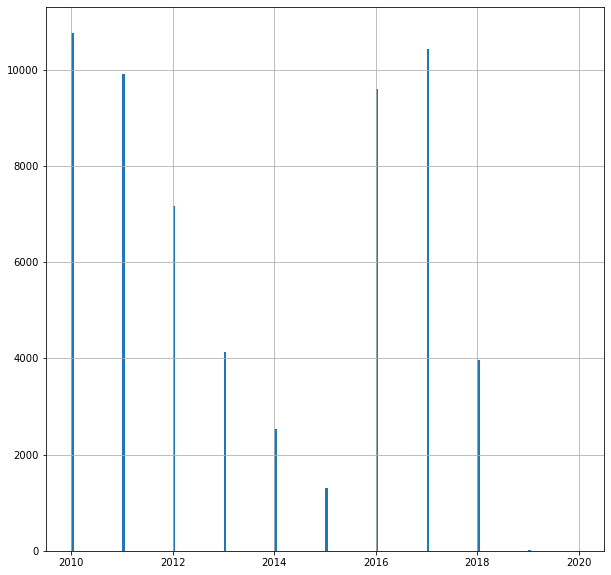

In [27]:
df.registration_year.hist(bins = 200, figsize=(10,10),range=(2010,2020));

на авто с 2012 года по 2015 какой то спад, а потом резкий подъем

In [28]:
df[(df['registration_year'] < 1920) | (df['registration_year'] > 2021)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,24148,2016-03-19 08:46:47
622,2016-03-16 16:55:09,0,NaN,1111,NaN,0,NaN,5000,0,NaN,opel,NaN,2016-03-16 00:00:00,44628,2016-03-20 16:44:37
6629,2016-04-02 13:47:16,0,small,1910,NaN,0,NaN,5000,1,other,sonstige_autos,NaN,2016-04-02 00:00:00,93105,2016-04-04 11:16:30
6977,2016-03-24 08:37:22,135,NaN,1910,NaN,0,NaN,5000,0,NaN,opel,NaN,2016-03-24 00:00:00,19374,2016-04-06 20:46:08
10183,2016-03-27 13:59:08,1250,NaN,1910,NaN,0,other,5000,0,NaN,audi,NaN,2016-03-27 00:00:00,18445,2016-04-07 10:45:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341791,2016-03-28 17:37:30,1,NaN,3000,NaN,0,zafira,5000,0,NaN,opel,NaN,2016-03-28 00:00:00,26624,2016-04-02 22:17:49
343083,2016-04-01 08:51:08,1,other,1910,NaN,0,NaN,5000,1,other,volkswagen,NaN,2016-04-01 00:00:00,18273,2016-04-07 05:44:39
348830,2016-03-22 00:38:15,1,NaN,1000,NaN,1000,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,41472,2016-04-05 14:18:01
351682,2016-03-12 00:57:39,11500,NaN,1800,NaN,16,other,5000,6,petrol,fiat,NaN,2016-03-11 00:00:00,16515,2016-04-05 19:47:27


Машины с ошибкой в RegistrationYear. Считаем что авто у нас в промежутке с 1920 - 2021

### Очистка от выбросов

#### колонка - год регистрации

In [29]:
df.shape

(354369, 15)

In [30]:
df = df[(df['registration_year'] >= 1920) & (df['registration_year'] <= 2016)]
df.shape

(339670, 15)

выбросы убрали

In [31]:
df[df['registration_year'] <= 1941]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
2273,2016-03-15 21:44:32,1800,convertible,1925,NaN,0,NaN,5000,1,NaN,sonstige_autos,no,2016-03-15 00:00:00,79288,2016-04-07 05:15:34
16635,2016-03-09 10:54:11,9500,suv,1941,manual,57,NaN,40000,1,petrol,sonstige_autos,no,2016-03-09 00:00:00,59557,2016-03-12 21:16:29
22621,2016-03-23 11:37:57,14000,sedan,1929,manual,30,NaN,5000,7,petrol,sonstige_autos,NaN,2016-03-23 00:00:00,90475,2016-04-05 11:18:18
26216,2016-03-16 21:43:10,15000,small,1940,manual,24,NaN,5000,7,petrol,sonstige_autos,no,2016-03-16 00:00:00,4924,2016-04-07 08:46:27
29933,2016-03-09 13:47:22,12900,sedan,1940,manual,0,NaN,150000,4,petrol,ford,NaN,2016-03-09 00:00:00,45657,2016-03-30 06:52:51
33638,2016-03-16 09:47:50,5400,small,1937,manual,0,other,20000,3,petrol,opel,no,2016-03-16 00:00:00,7907,2016-03-17 07:47:51
34055,2016-03-25 00:55:47,2900,small,1937,manual,34,other,40000,7,petrol,ford,yes,2016-03-25 00:00:00,33378,2016-04-02 07:16:41
37953,2016-03-07 22:51:16,9500,other,1937,NaN,0,other,20000,4,NaN,ford,NaN,2016-03-07 00:00:00,48599,2016-04-06 22:15:45
54749,2016-03-09 22:37:45,0,small,1933,NaN,0,NaN,5000,0,petrol,fiat,NaN,2016-03-09 00:00:00,53919,2016-03-11 10:44:11
68185,2016-03-25 14:48:15,19900,convertible,1932,manual,18,other,5000,2,petrol,bmw,no,2016-03-25 00:00:00,99735,2016-04-06 18:15:26


Довоенные машины (очень раритетные)

In [32]:
df[(df['registration_year'] > 1941) & (df['registration_year'] <= 1970)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
630,2016-03-18 12:43:41,12000,sedan,1969,manual,140,s_klasse,80000,3,petrol,mercedes_benz,no,2016-03-18 00:00:00,46286,2016-04-05 22:16:44
1331,2016-04-03 19:53:44,650,NaN,1970,NaN,26,NaN,100000,5,NaN,trabant,NaN,2016-04-03 00:00:00,9337,2016-04-05 20:45:24
1794,2016-04-03 21:49:57,12800,coupe,1965,manual,90,other,100000,8,petrol,ford,no,2016-04-03 00:00:00,12049,2016-04-05 23:15:21
1844,2016-03-31 19:50:00,1200,NaN,1970,manual,0,kaefer,150000,5,petrol,volkswagen,NaN,2016-03-31 00:00:00,90459,2016-04-06 14:17:55
1928,2016-03-25 15:58:21,7000,suv,1945,manual,48,other,150000,2,petrol,volkswagen,no,2016-03-25 00:00:00,58135,2016-03-25 15:58:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353447,2016-03-27 00:46:19,2900,small,1969,manual,18,500,5000,8,petrol,fiat,no,2016-03-26 00:00:00,74076,2016-03-28 17:45:04
353912,2016-03-05 20:43:30,800,NaN,1970,NaN,0,other,150000,0,NaN,trabant,NaN,2016-03-05 00:00:00,1609,2016-03-12 08:17:10
354037,2016-03-23 16:57:30,10500,convertible,1968,manual,54,other,20000,4,NaN,renault,no,2016-03-23 00:00:00,63755,2016-03-25 00:47:18
354063,2016-03-08 23:37:04,0,NaN,1970,NaN,0,sl,150000,0,NaN,mercedes_benz,NaN,2016-03-08 00:00:00,34123,2016-04-07 05:15:38


Раритетные машины

In [33]:
df[(df['registration_year'] > 1970) & (df['registration_year'] < 1990)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,19348,2016-03-25 16:47:58
28,2016-03-09 11:56:38,1990,bus,1981,manual,50,transporter,5000,1,petrol,volkswagen,no,2016-03-09 00:00:00,87471,2016-03-10 07:44:33
39,2016-03-25 15:50:30,1500,bus,1984,manual,70,other,150000,8,gasoline,mercedes_benz,no,2016-03-25 00:00:00,22767,2016-03-27 03:17:02
91,2016-04-02 23:25:25,1222,sedan,1984,auto,180,other,150000,3,petrol,opel,NaN,2016-04-02 00:00:00,57290,2016-04-06 14:44:57
145,2016-03-06 21:38:00,150,NaN,1985,NaN,0,100,150000,4,petrol,audi,NaN,2016-03-06 00:00:00,87616,2016-04-07 02:16:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354220,2016-03-14 23:53:14,2200,convertible,1988,manual,0,golf,150000,6,petrol,volkswagen,no,2016-03-14 00:00:00,4179,2016-03-17 23:46:44
354237,2016-03-17 13:38:56,2500,sedan,1988,auto,188,7er,150000,10,petrol,bmw,no,2016-03-17 00:00:00,67547,2016-03-31 21:44:25
354286,2016-03-21 20:44:38,16500,coupe,1973,manual,200,other,150000,6,petrol,bmw,yes,2016-03-21 00:00:00,74722,2016-04-06 19:16:32
354302,2016-03-12 08:37:15,5990,bus,1984,auto,0,other,70000,4,petrol,chevrolet,NaN,2016-03-12 00:00:00,87600,2016-03-24 23:47:48


Старые машины

In [34]:
df[df['registration_year'] >= 1990]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26


современные машины

In [35]:
def registration_year_id(registration_year):
    
    if registration_year <= 1941:
        return 'древние'
    
    elif registration_year <= 1970:
        return 'раритетные'
    
    elif registration_year < 1990:
        return "старые"
    
    elif registration_year >= 1990:
        return "современные"

In [36]:
df['registration_year_id']=df['registration_year'].apply(registration_year_id)

In [37]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,registration_year_id
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,современные
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,современные
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,современные
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,современные
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,современные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,2694,2016-03-21 10:42:49,современные
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,современные
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,современные
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,современные


#### Посмотрим на бренды авто

In [38]:
df['brand'].value_counts()

volkswagen        73169
opel              37992
bmw               35796
mercedes_benz     31002
audi              28472
ford              24164
renault           16925
peugeot           10623
fiat               9156
seat               6535
mazda              5397
skoda              5358
smart              5029
citroen            4915
nissan             4747
toyota             4459
hyundai            3446
sonstige_autos     3160
volvo              3142
mini               3094
mitsubishi         2909
honda              2688
kia                2364
suzuki             2249
alfa_romeo         2232
chevrolet          1703
chrysler           1393
dacia               874
daihatsu            780
porsche             747
subaru              740
jeep                651
trabant             570
land_rover          537
saab                514
daewoo              513
jaguar              500
rover               459
lancia              448
lada                218
Name: brand, dtype: int64

первая пятерка - немецкие производители

In [39]:
platform_table_brand_count_model = df.groupby(['brand', 'model'])\
                                     .aggregate({'model':'count'})\
                                     .rename(columns={'model':"count_model"})\
                                     .sort_values('count_model')
platform_table_brand_count_model_top20 = platform_table_brand_count_model.head(20)
platform_table_brand_count_model_tail20 = platform_table_brand_count_model.tail(20)

Посмотрим на редкие марки автомобилей

In [40]:
platform_table_brand_count_model_top20

count_model
brand         model                          
rover         defender                      1
              discovery                     2
land_rover    range_rover_evoque            2
              serie_1                       2
rover         rangerover                    3
              freelander                    3
land_rover    serie_3                       4
lada          kalina                        6
land_rover    serie_2                       7
lancia        elefantino                    8
bmw           i3                            8
mercedes_benz gl                           12
lada          samara                       13
lancia        kappa                        15
volkswagen    amarok                       15
audi          q3                           15
daihatsu      materia                      18
land_rover    other                        18
audi          200                          18
lancia        musa                         22

Посмотрим на частые марки автомобилей в нашей выборке

In [41]:
platform_table_brand_count_model_tail20

count_model
brand         model                   
mercedes_benz a_klasse            3919
opel          vectra              4097
smart         fortwo              4189
renault       twingo              4645
volkswagen    transporter         4665
peugeot       2_reihe             4699
audi          a6                  5425
ford          fiesta              5550
              focus               5631
audi          a3                  5761
mercedes_benz e_klasse            6638
bmw           5er                 7721
mercedes_benz c_klasse            8113
audi          a4                  9695
volkswagen    passat              9842
opel          astra              10336
              corsa              11936
volkswagen    polo               12450
bmw           3er                19223
volkswagen    golf               27610

<Figure size 432x288 with 0 Axes>

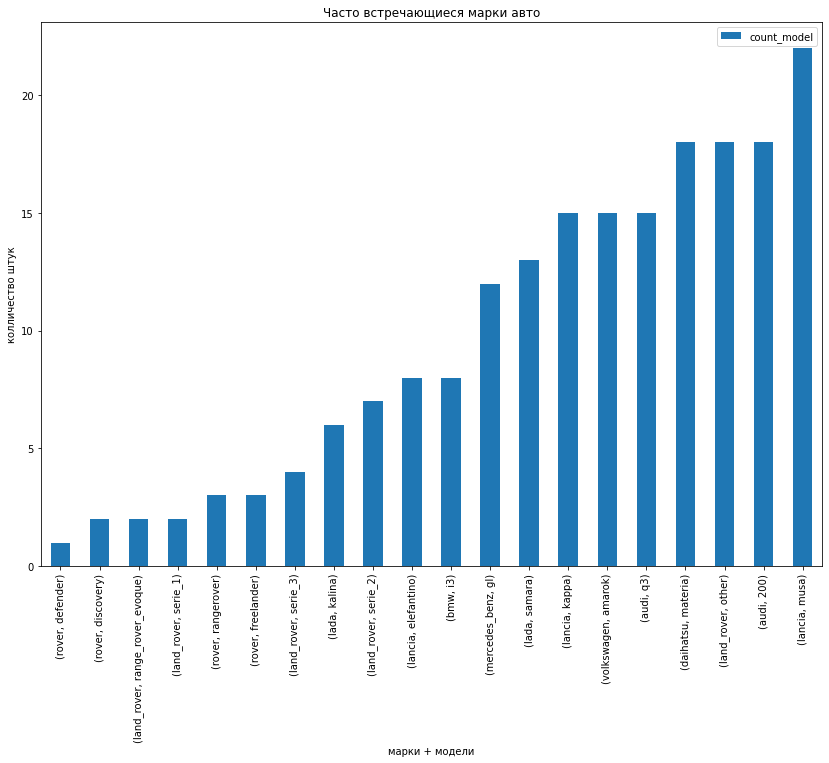

<Figure size 432x288 with 0 Axes>

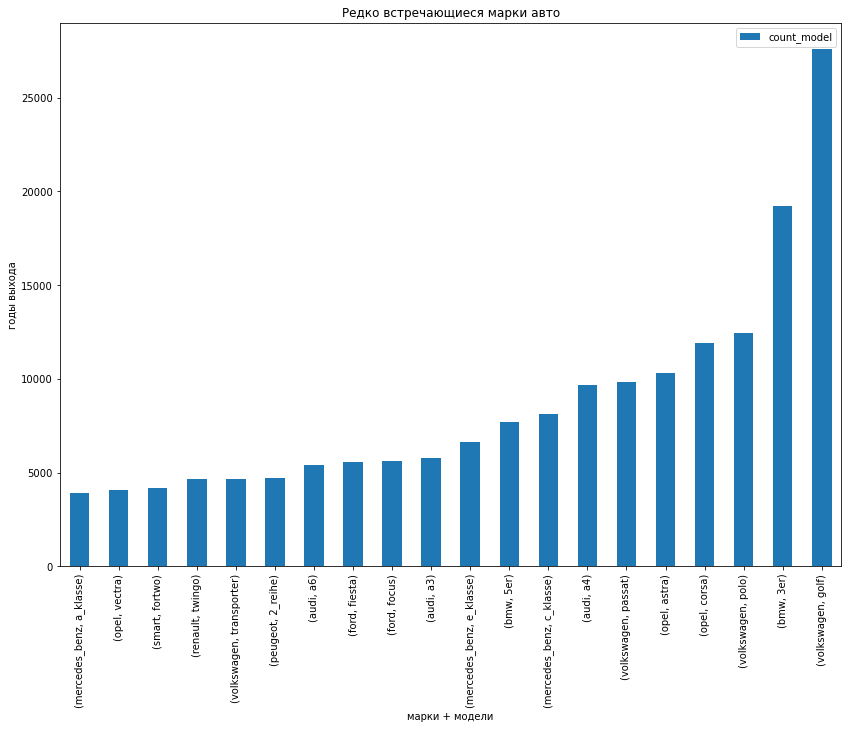

In [42]:
# посмотрим на топ 
plt.figure()
platform_table_brand_count_model_top20.plot(figsize=(14,10),kind = 'bar', title = 'Часто встречающиеся марки авто')
plt.xlabel('марки + модели')
plt.ylabel('колличество штук')
plt.show();

# посмотрим на 
plt.figure()
platform_table_brand_count_model_tail20.plot(figsize=(14,10),kind = 'bar', title = 'Редко встречающиеся марки авто')
plt.xlabel('марки + модели')
plt.ylabel('годы выхода')
plt.show();

Посмотрим в целом по брендам каких авто больше, каких меньше

In [43]:
platform_table_brand=df.pivot_table(index=['brand'], values='model', aggfunc='count').sort_values(['model'], ascending = False)

<Figure size 432x288 with 0 Axes>

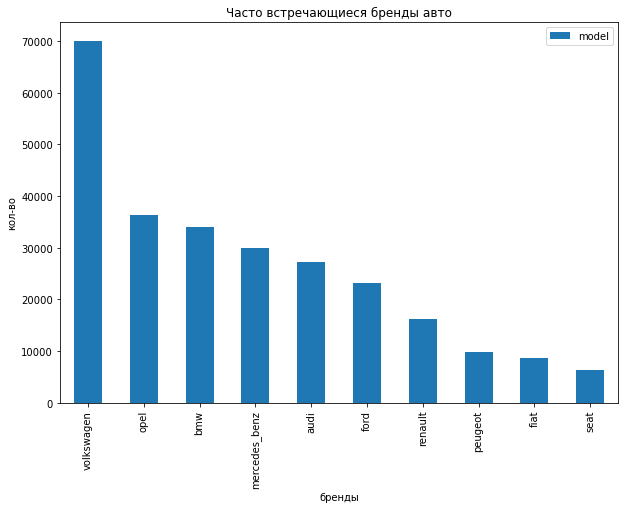

<Figure size 432x288 with 0 Axes>

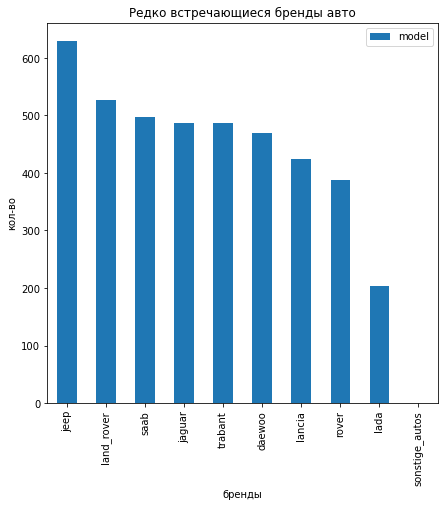

In [44]:
plt.figure()
platform_table_brand.head(10).plot(figsize=(10,7),kind = 'bar', title = 'Часто встречающиеся бренды авто')
plt.xlabel('бренды')
plt.ylabel('кол-во')
plt.show()

plt.figure()
platform_table_brand.tail(10).plot(figsize=(7,7),kind = 'bar', title = 'Редко встречающиеся бренды авто')
plt.xlabel('бренды')
plt.ylabel('кол-во')
plt.show()

Поисследуем модели

In [45]:
df['model'].value_counts()

golf                  27610
other                 23863
3er                   19223
polo                  12450
corsa                 11936
                      ...  
kalina                    6
serie_3                   4
rangerover                3
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64

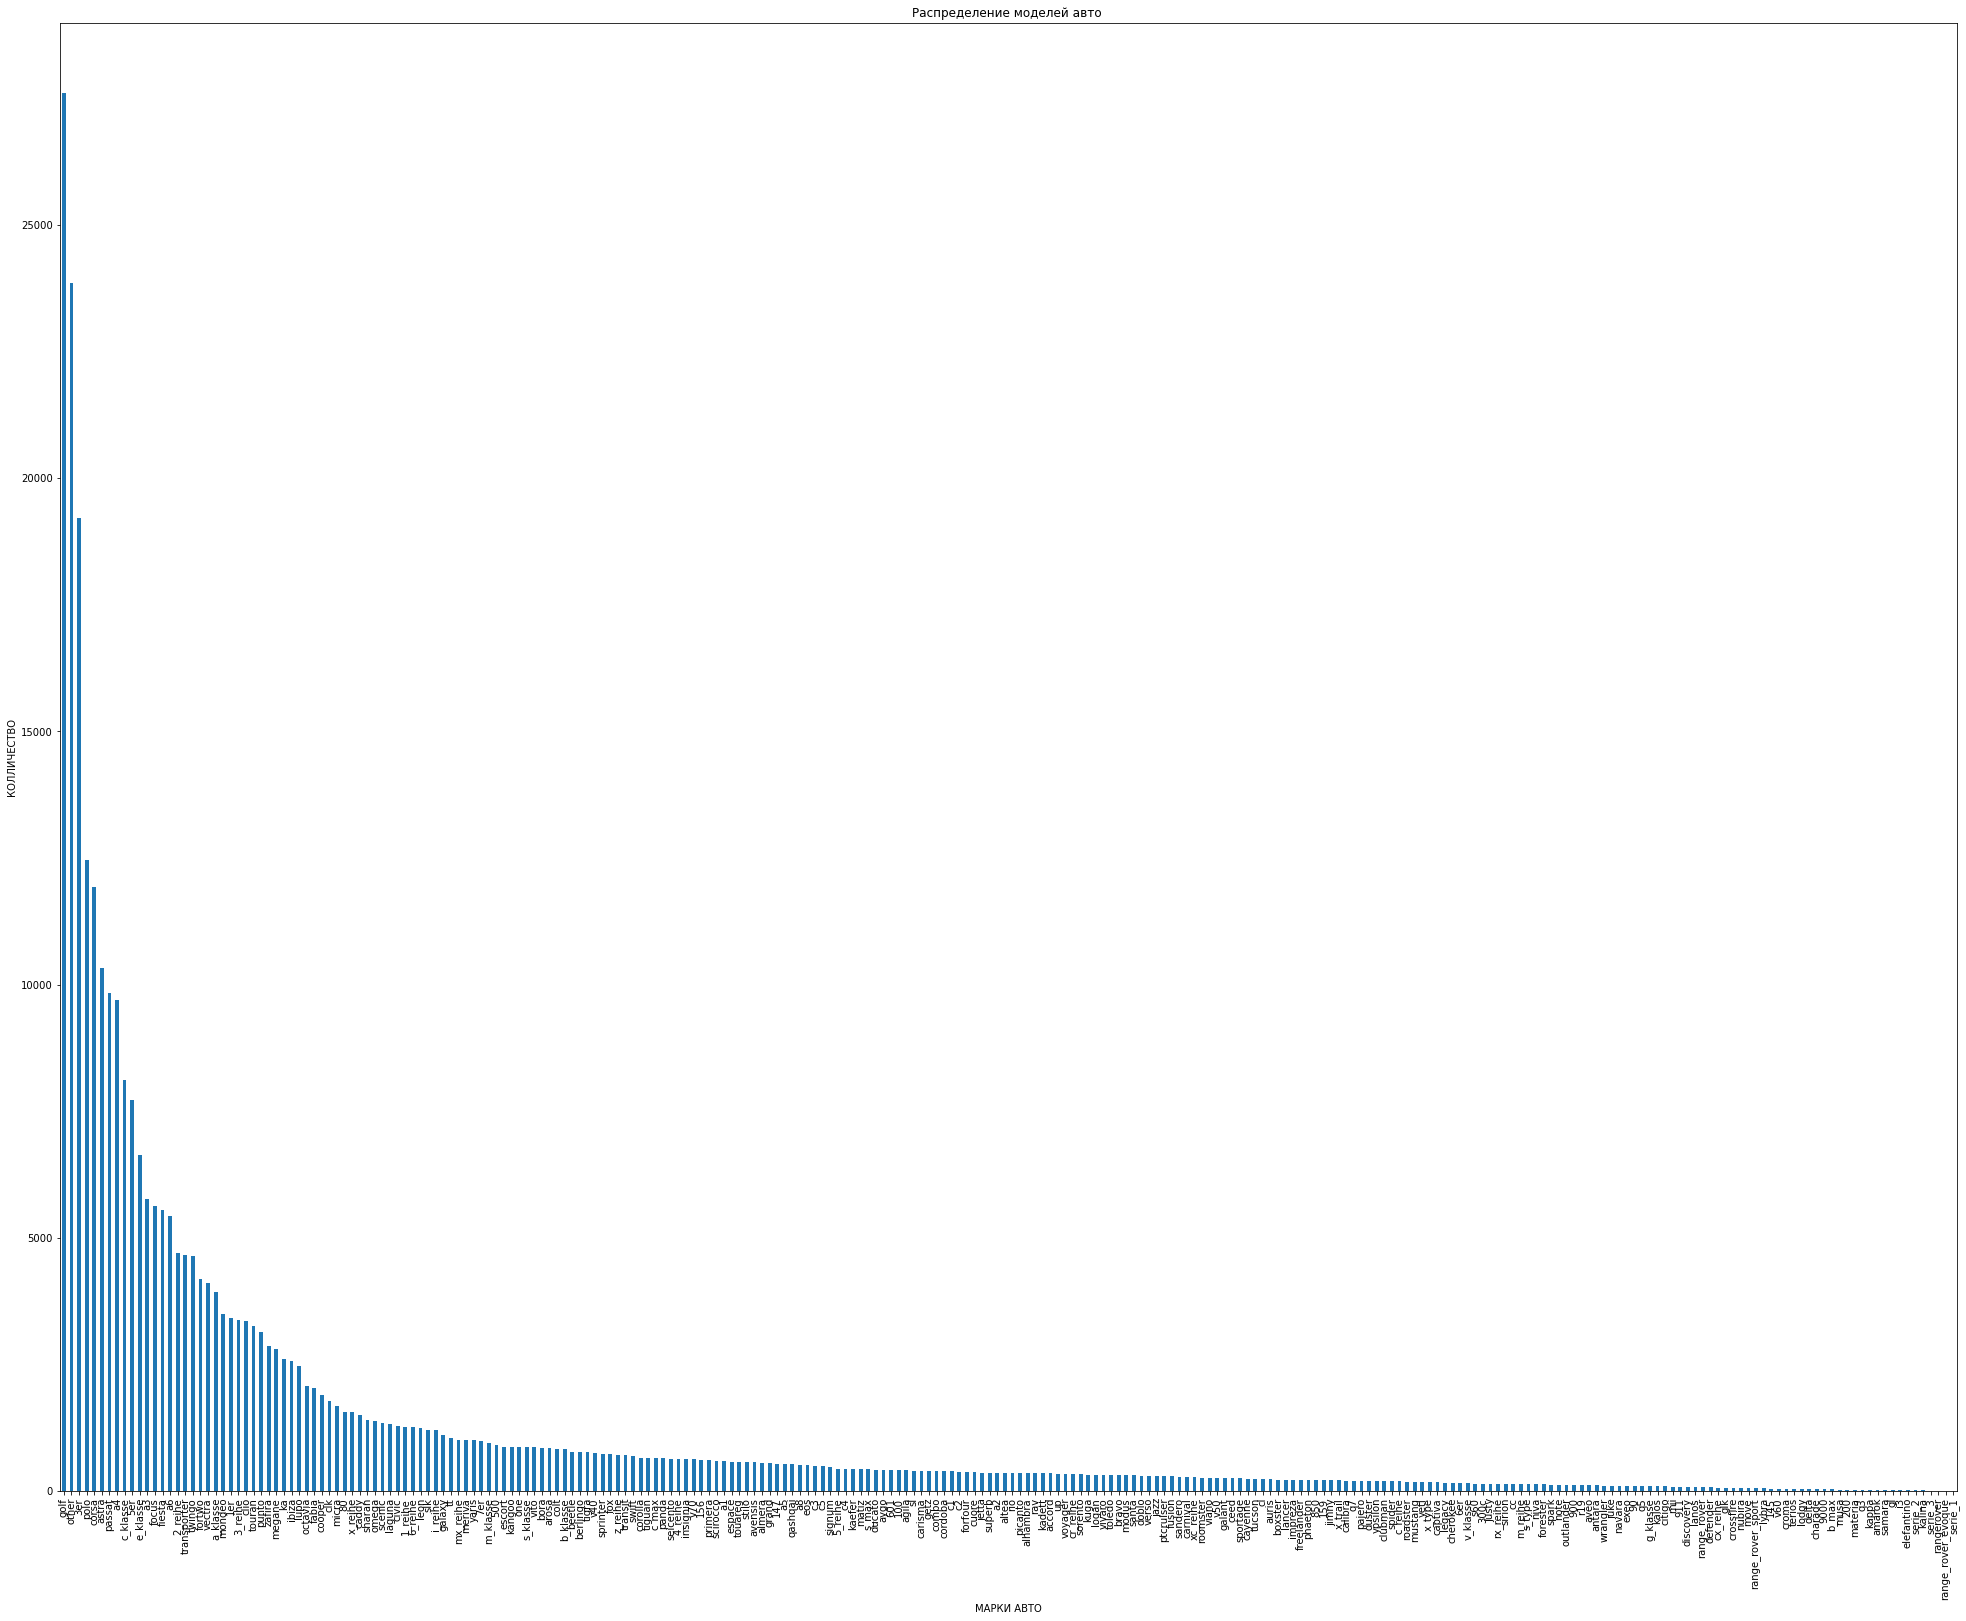

In [46]:
plt.figure()
df['model'].value_counts().plot(figsize=(34,27),kind = 'bar', title = 'Распределение моделей авто ')
plt.xlabel('МАРКИ АВТО')
plt.ylabel('КОЛЛИЧЕСТВО')
plt.show()

немецкий автопром впереди планеты всей

#### Исследуем на дубликаты

In [47]:
df.duplicated().sum()

4

In [48]:
df.drop_duplicates().reset_index(drop=True)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,registration_year_id
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,современные
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,современные
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,современные
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,современные
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,современные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339661,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,2694,2016-03-21 10:42:49,современные
339662,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,современные
339663,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,современные
339664,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,современные


#### Посмотрим на цены

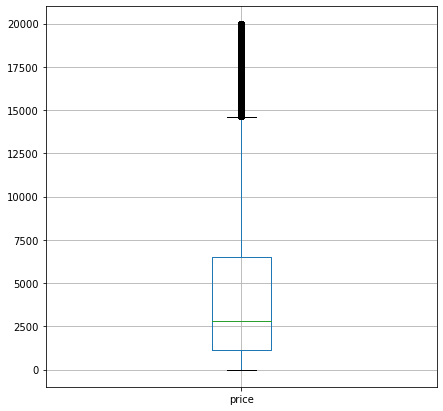

In [49]:
df[['price']].boxplot(figsize=(7,7));

Околонулевые суммы явная ошибка! принимаем такой постулат: машина не может стоить меньше 100

In [50]:
df = df[df['price'] > 100]
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,registration_year_id
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,современные
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,современные
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,современные
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,современные
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,современные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27 00:00:00,26624,2016-03-29 10:17:23,современные
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,современные
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,современные
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,современные


Обновили наш датафрейм выкинув из него маленькие суммы

#### Посмотрим на мощности

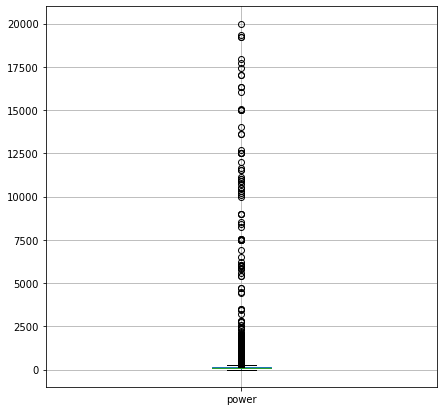

In [51]:
df[['power']].boxplot(figsize=(7,7));

Видим много выбросов. Принимаем постулат что автомобиль мощьностью больше 2500 быть не может. (хотя и 2500 многовато)

In [52]:
df[df['power']<10].count()

date_crawled            31383
price                   31383
vehicle_type            23571
registration_year       31383
gearbox                 22258
power                   31383
model                   27277
kilometer               31383
registration_month      31383
fuel_type               23861
brand                   31383
not_repaired            15832
date_created            31383
postal_code             31383
last_seen               31383
registration_year_id    31383
dtype: int64

много автомобилей с околонулевой мощностью. Тоже выбросы

In [53]:
df[df['power']>2500].count()

date_crawled            84
price                   84
vehicle_type            79
registration_year       84
gearbox                 80
power                   84
model                   77
kilometer               84
registration_month      84
fuel_type               68
brand                   84
not_repaired            49
date_created            84
postal_code             84
last_seen               84
registration_year_id    84
dtype: int64

In [54]:
df = df[(df['power']<2500) & (df['power']>10)]
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,registration_year_id
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,современные
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,современные
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,современные
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,современные
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,современные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354361,2016-03-09 13:37:43,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09 00:00:00,51371,2016-03-13 01:44:13,современные
354362,2016-03-19 19:53:49,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,2016-03-19 00:00:00,96465,2016-03-19 20:44:43,современные
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,современные
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,современные


Обновили наш датафрейм выкинув из него неадекватные мощности

#### Посмотрим на пробег

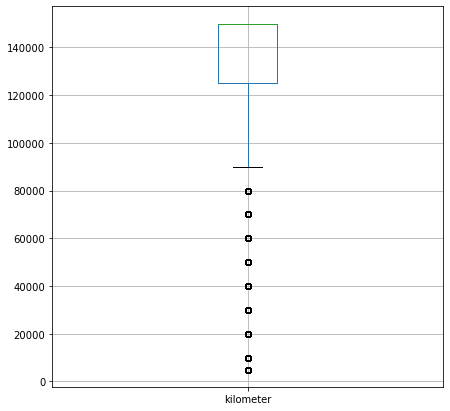

In [55]:
df[['kilometer']].boxplot(figsize=(7,7));

тут вроде бы все нормально.

#### Посмотрим на месяц регистрации

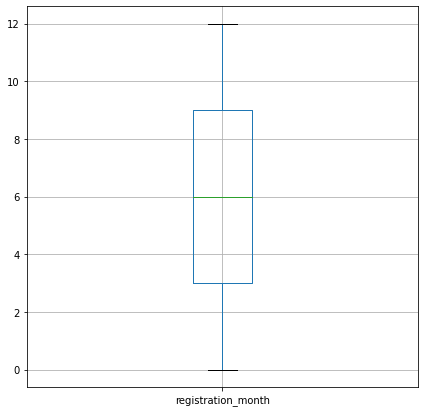

In [56]:
df[['registration_month']].boxplot(figsize=(7,7));

In [57]:
df['registration_month'].value_counts()

3     30340
6     27481
4     25667
5     25534
7     23768
10    22904
12    21139
11    20997
9     20907
1     20095
8     19665
2     18810
0     17492
Name: registration_month, dtype: int64

месяц 0 это ошибка. Предполагаю, что 0 это имелся в виду первый месяц года, т.е. январь

In [58]:
df = df[df['registration_month'] != 0]

In [59]:
df['registration_month'].value_counts()

3     30340
6     27481
4     25667
5     25534
7     23768
10    22904
12    21139
11    20997
9     20907
1     20095
8     19665
2     18810
Name: registration_month, dtype: int64

Проверили. Все ок, нулей нет.

In [60]:
df.shape

(277307, 16)

Еще раз проверили пропуски

In [61]:
df.isnull().sum()

date_crawled                0
price                       0
vehicle_type             7421
registration_year           0
gearbox                  3737
power                       0
model                    8792
kilometer                   0
registration_month          0
fuel_type               10979
brand                       0
not_repaired            33753
date_created                0
postal_code                 0
last_seen                   0
registration_year_id        0
dtype: int64

Считаем что не имеем права заменять медианными или средними значениями, т.к. можем исказить данные. Просто заменим сломом Unknown

In [62]:
df["vehicle_type"] = df["vehicle_type"].fillna('Unknown')
df["gearbox"] = df["gearbox"].fillna('Unknown')
df["model"] = df["model"].fillna('Unknown')
df["fuel_type"] = df["fuel_type"].fillna('Unknown')
df["not_repaired"] = df["not_repaired"].fillna('Unknown')


Еще раз проверим

In [63]:
df.isnull().sum()

date_crawled            0
price                   0
vehicle_type            0
registration_year       0
gearbox                 0
power                   0
model                   0
kilometer               0
registration_month      0
fuel_type               0
brand                   0
not_repaired            0
date_created            0
postal_code             0
last_seen               0
registration_year_id    0
dtype: int64

Все ок

Посмотрим на взаимосвязь признаков

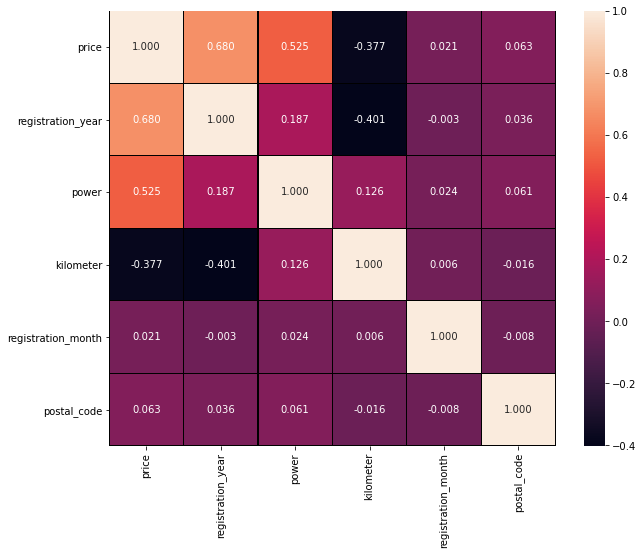

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.3f', linecolor='black', linewidths=0.1);

сильно коррелирующих фичей не наблюдаю. Есть большие корреляции года выпуска, мощности и пробега к цене

In [65]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,registration_year_id
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,Unknown,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,современные
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Unknown,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,современные
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,современные
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,современные
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,современные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354361,2016-03-09 13:37:43,5250,Unknown,2016,auto,150,159,150000,12,Unknown,alfa_romeo,no,2016-03-09 00:00:00,51371,2016-03-13 01:44:13,современные
354362,2016-03-19 19:53:49,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,2016-03-19 00:00:00,96465,2016-03-19 20:44:43,современные
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,современные
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,современные


In [66]:
df = df[['price','vehicle_type','registration_year',\
         'gearbox','power','model','kilometer',\
         'registration_month','fuel_type','brand',\
         'not_repaired', 'registration_year_id']]
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,registration_year_id
1,18300,coupe,2011,manual,190,Unknown,125000,5,gasoline,audi,yes,современные
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Unknown,современные
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,современные
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,современные
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,современные
...,...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,Unknown,2016,auto,150,159,150000,12,Unknown,alfa_romeo,no,современные
354362,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,современные
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,современные
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,современные


сделаем резервную копию на всякий случай

In [67]:
df_copy = df.copy()

In [68]:
df.vehicle_type.unique()

array(['coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       'Unknown', 'other'], dtype=object)

Преобразуем наши категориальные значения

In [69]:
encoder = OrdinalEncoder()

In [70]:
df[['vehicle_type','gearbox','model','fuel_type','brand','not_repaired','registration_year_id']] = \
encoder.fit_transform(df[['vehicle_type','gearbox','model','fuel_type','brand','not_repaired','registration_year_id']])
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,registration_year_id
1,18300,3.0,2011,2.0,190,26.0,125000,5,3.0,1.0,2.0,2.0
2,9800,7.0,2004,1.0,163,118.0,125000,8,3.0,14.0,0.0,2.0
3,1500,6.0,2001,2.0,75,117.0,150000,6,7.0,38.0,1.0,2.0
4,3600,6.0,2008,2.0,69,102.0,90000,7,3.0,31.0,1.0,2.0
5,650,5.0,1995,2.0,102,11.0,150000,10,7.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,0.0,2016,1.0,150,4.0,150000,12,0.0,0.0,1.0,2.0
354362,3200,5.0,2004,2.0,225,141.0,150000,5,7.0,30.0,2.0,2.0
354366,1199,2.0,2000,1.0,101,107.0,125000,3,7.0,32.0,1.0,2.0
354367,9200,1.0,1996,2.0,102,224.0,150000,3,3.0,38.0,1.0,2.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277307 entries, 1 to 354368
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 277307 non-null  int64  
 1   vehicle_type          277307 non-null  float64
 2   registration_year     277307 non-null  int64  
 3   gearbox               277307 non-null  float64
 4   power                 277307 non-null  int64  
 5   model                 277307 non-null  float64
 6   kilometer             277307 non-null  int64  
 7   registration_month    277307 non-null  int64  
 8   fuel_type             277307 non-null  float64
 9   brand                 277307 non-null  float64
 10  not_repaired          277307 non-null  float64
 11  registration_year_id  277307 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 27.5 MB


Преобразуем наши типы данных в int

In [72]:
df['vehicle_type']=df['vehicle_type'].astype('int')
df['gearbox']=df['gearbox'].astype('int')
df['model']=df['model'].astype('int')
df['fuel_type']=df['fuel_type'].astype('int')
df['brand']=df['brand'].astype('int')
df['not_repaired']=df['not_repaired'].astype('int')
df['registration_year_id']=df['registration_year_id'].astype('int')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277307 entries, 1 to 354368
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   price                 277307 non-null  int64
 1   vehicle_type          277307 non-null  int32
 2   registration_year     277307 non-null  int64
 3   gearbox               277307 non-null  int32
 4   power                 277307 non-null  int64
 5   model                 277307 non-null  int32
 6   kilometer             277307 non-null  int64
 7   registration_month    277307 non-null  int64
 8   fuel_type             277307 non-null  int32
 9   brand                 277307 non-null  int32
 10  not_repaired          277307 non-null  int32
 11  registration_year_id  277307 non-null  int32
dtypes: int32(7), int64(5)
memory usage: 20.1 MB


In [74]:
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,registration_year_id
1,18300,3,2011,2,190,26,125000,5,3,1,2,2
2,9800,7,2004,1,163,118,125000,8,3,14,0,2
3,1500,6,2001,2,75,117,150000,6,7,38,1,2
4,3600,6,2008,2,69,102,90000,7,3,31,1,2
5,650,5,1995,2,102,11,150000,10,7,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,0,2016,1,150,4,150000,12,0,0,1,2
354362,3200,5,2004,2,225,141,150000,5,7,30,2,2
354366,1199,2,2000,1,101,107,125000,3,7,32,1,2
354367,9200,1,1996,2,102,224,150000,3,3,38,1,2


Выводы: 
анализ данных показал что больше всего:
 - немецких машин
 - машин выпущенных в диапазоне 1990-2010 год
 - седанов
 - машин с ручной коробкой
 - машин на бензине
 - машин не продававшиеся ранее

Обнаруженные в данных пропуски и выбросы подчистили и заполнили. В процессе продобработки потеряли порядка 14 % данных. В данном случае считаем что это не критично, т.к. 300 тысяч строк это довольно большой датасет.

## Обучение моделей

Разовьем данные на тестовую и тренировочную выборки

In [75]:
features_train, features_valid, target_train, target_valid = train_test_split(
    df.drop(['price'], axis=1), df.price, test_size=0.25, random_state=12345)   

Для замера времени выполнения ячейки и результата введем два списка

In [76]:
time_value = []

In [77]:
RMSE_value = []

In [78]:
model = []

Создадим список с категориальными признаками

In [79]:
cat_features = ['vehicle_type','registration_year','registration_year_id', 'gearbox', 'model',
                'registration_month', 'fuel_type', 'brand', 'not_repaired']

### обучим модель CatBoostRegressor

In [80]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277307 entries, 1 to 354368
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   price                 277307 non-null  int64 
 1   vehicle_type          277307 non-null  object
 2   registration_year     277307 non-null  int64 
 3   gearbox               277307 non-null  object
 4   power                 277307 non-null  int64 
 5   model                 277307 non-null  object
 6   kilometer             277307 non-null  int64 
 7   registration_month    277307 non-null  int64 
 8   fuel_type             277307 non-null  object
 9   brand                 277307 non-null  object
 10  not_repaired          277307 non-null  object
 11  registration_year_id  277307 non-null  object
dtypes: int64(5), object(7)
memory usage: 27.5+ MB


In [81]:
df_copy

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,registration_year_id
1,18300,coupe,2011,manual,190,Unknown,125000,5,gasoline,audi,yes,современные
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Unknown,современные
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,современные
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,современные
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,современные
...,...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,Unknown,2016,auto,150,159,150000,12,Unknown,alfa_romeo,no,современные
354362,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,современные
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,современные
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,современные


In [82]:
features_train_copy, features_valid_copy, target_train_copy, target_valid_copy = train_test_split(
    df_copy.drop(['price'], axis=1), df_copy.price, test_size=0.25, random_state=12345) 

In [83]:
start_time = time.time()

cat = GridSearchCV(estimator=CatBoostRegressor(loss_function='RMSE',learning_rate = 0.4, iterations  = 300, random_state=12345),param_grid={},
            cv=3, verbose=100, n_jobs=-1)

grid_result = cat.fit(features_train, target_train, cat_features=cat_features)

pred_valid = grid_result.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5
time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('CatBoostRegressor + features')
RMSE


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
0:	learn: 3442.7579772	total: 327ms	remaining: 1m 37s
1:	learn: 2792.8570801	total: 474ms	remaining: 1m 10s
2:	learn: 2457.2901933	total: 670ms	remaining: 1m 6s
3:	learn: 2216.6798984	total: 861ms	remaining: 1m 3s
4:	learn: 2090.9399175	total: 1.03s	remaining: 1m
5:	learn: 2020.2296047	total: 1.22s	remaining: 59.9s
6:	learn: 1980.6191569	total: 1.41s	remaining: 58.8s
7:	learn: 1946.0981940	total: 1.63s	remaining: 59.6s
8:	learn: 1921.7734698	total: 1.79s	remaining: 57.8s
9:	learn: 1905.8726939	total: 1.98s	remaining: 57.5s
10:	learn: 1885.7667166	total: 2.13s	remaining: 55.9s
11:	learn: 1875.6803532	total: 2.32s	remaining: 55.6s
12:	learn: 186

146:	learn: 1587.0820102	total: 31.6s	remaining: 32.9s
147:	learn: 1586.0749679	total: 31.8s	remaining: 32.7s
148:	learn: 1585.8229659	total: 32.1s	remaining: 32.5s
149:	learn: 1585.5570876	total: 32.3s	remaining: 32.3s
150:	learn: 1584.9899712	total: 32.5s	remaining: 32s
151:	learn: 1584.2270871	total: 32.7s	remaining: 31.8s
152:	learn: 1583.8920259	total: 32.9s	remaining: 31.6s
153:	learn: 1583.3763338	total: 33.1s	remaining: 31.4s
154:	learn: 1583.3400665	total: 33.3s	remaining: 31.1s
155:	learn: 1583.1008350	total: 33.5s	remaining: 30.9s
156:	learn: 1582.9649040	total: 33.7s	remaining: 30.7s
157:	learn: 1582.6617210	total: 33.9s	remaining: 30.5s
158:	learn: 1582.1843777	total: 34.2s	remaining: 30.3s
159:	learn: 1581.7162226	total: 34.3s	remaining: 30s
160:	learn: 1580.7110720	total: 34.6s	remaining: 29.9s
161:	learn: 1579.9776428	total: 34.8s	remaining: 29.6s
162:	learn: 1579.7160645	total: 35s	remaining: 29.4s
163:	learn: 1578.6671324	total: 35.2s	remaining: 29.2s
164:	learn: 1578

298:	learn: 1524.5620259	total: 1m 4s	remaining: 217ms
299:	learn: 1523.9655522	total: 1m 5s	remaining: 0us


1585.6490038923632

### обучим модель XGBRegressor

In [84]:
start_time = time.time()

gsc = GridSearchCV(estimator=xgb.XGBRegressor(max_depth = 12, learning_rate = 0.2, colsample_bytree  = 0.8, random_state=12345, min_child_weight = 0.1),param_grid={},
            cv=3, verbose=0, n_jobs=-1)

grid_result = gsc.fit(features_train, target_train)

pred_valid = grid_result.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5

time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('XGBRegressor')

RMSE

1495.9117997879032

### обучим модель LGBMModel

In [85]:
start_time = time.time()

model_lgb = GridSearchCV(estimator=lgb.LGBMModel(objective="regression", iterations = 300, n_estimators = 500, learning_rate = 0.1, max_depth = 12),
                   param_grid={},cv=3,scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = model_lgb.fit(features_train, target_train, categorical_feature=cat_features)

pred_valid = grid_result.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5

time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('LGBMModel + features')

RMSE

[LightGBM] [Warning] Unknown parameter: iterations


1523.1988858933214

Поскольку эта модель получилась с наилучшими признаками точности и скорости то ее мы и исследуем

In [86]:
model_lgb = lgb.LGBMModel(objective="regression", iterations = 300, n_estimators = 500, learning_rate = 0.1, max_depth = 12)
model_lgb.fit(features_train, target_train)
pred_valid = model_lgb.predict(features_valid)


[LightGBM] [Warning] Unknown parameter: iterations


И теперь посмотрим какие же признаки повлияли больше всего

<AxesSubplot:xlabel='feature'>

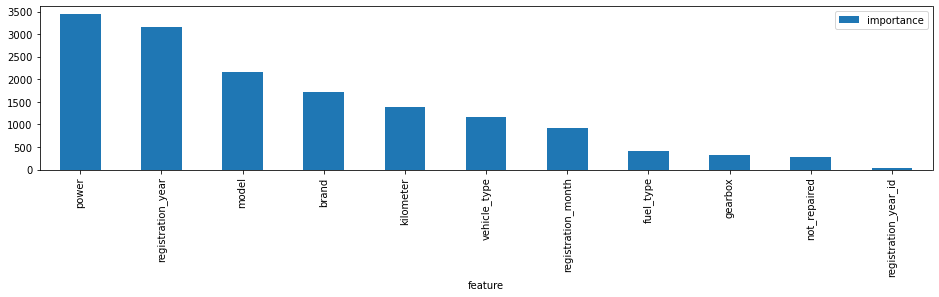

In [87]:
importances = pd.DataFrame({'feature':features_valid.columns,'importance':np.round(model_lgb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(16, 3))

Наиболее важным признаком оказалась мощность и год регистрации, дальше идут модельи бренд. введенный нами фактор раритетная/современная/старое авто себя не очень оправдал...

#### Анализ остатков

соберем в один датафрейм предсказанные и валидационные значения

In [88]:
tabl = pd.DataFrame({'target_valid':target_valid, 'pred_valid':pred_valid})
tabl

,target_valid,pred_valid
121647,980,1002.926139
136601,8600,3075.961961
218266,4950,5324.365533
207866,2300,2256.778298
130569,3900,4563.114553
...,...,...
156863,6200,6826.224576
295054,4700,4400.447818
30282,5950,4515.726373
168754,11495,10702.949527


найдем их разность (delta)

In [89]:
tabl['delta'] = tabl['target_valid'] - tabl['pred_valid']
tabl

,target_valid,pred_valid,delta
121647,980,1002.926139,-22.926139
136601,8600,3075.961961,5524.038039
218266,4950,5324.365533,-374.365533
207866,2300,2256.778298,43.221702
130569,3900,4563.114553,-663.114553
...,...,...,...
156863,6200,6826.224576,-626.224576
295054,4700,4400.447818,299.552182
30282,5950,4515.726373,1434.273627
168754,11495,10702.949527,792.050473


полученные значения delta поместим в таблицу с признаками

In [90]:
features_valid['delta'] = tabl['delta']
features_valid

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,registration_year_id,delta
121647,5,1994,2,75,117,150000,10,7,38,1,2,-22.926139
136601,1,2004,2,101,223,150000,12,3,10,1,2,5524.038039
218266,5,1963,2,40,167,30000,12,7,10,1,1,-374.365533
207866,1,2002,2,146,113,150000,10,7,10,0,2,43.221702
130569,8,2004,1,122,60,150000,7,3,20,1,2,-663.114553
...,...,...,...,...,...,...,...,...,...,...,...,...
156863,8,2006,2,140,29,150000,4,3,1,1,2,-626.224576
295054,6,2005,2,64,174,50000,8,7,38,1,2,299.552182
30282,5,2006,2,140,74,150000,3,7,11,1,2,1434.273627
168754,8,2008,1,179,32,150000,7,3,1,1,2,792.050473


Итак, посмотрим как у нас распределеились ошибки исходя из разных признаков

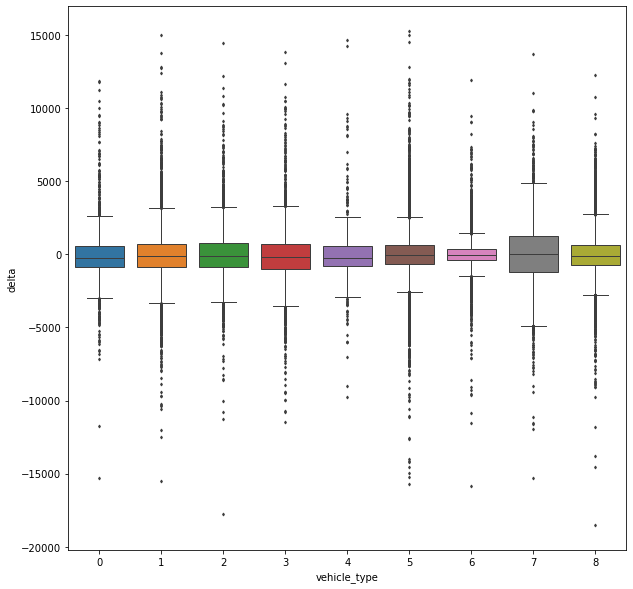

In [91]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='vehicle_type',y='delta',data=features_valid,linewidth=1,fliersize=2)
plt.show()

Как будто бы все примерно одинаково.... Конечно есть разница между 6 и 7 значениями, но медиана почти в линию.

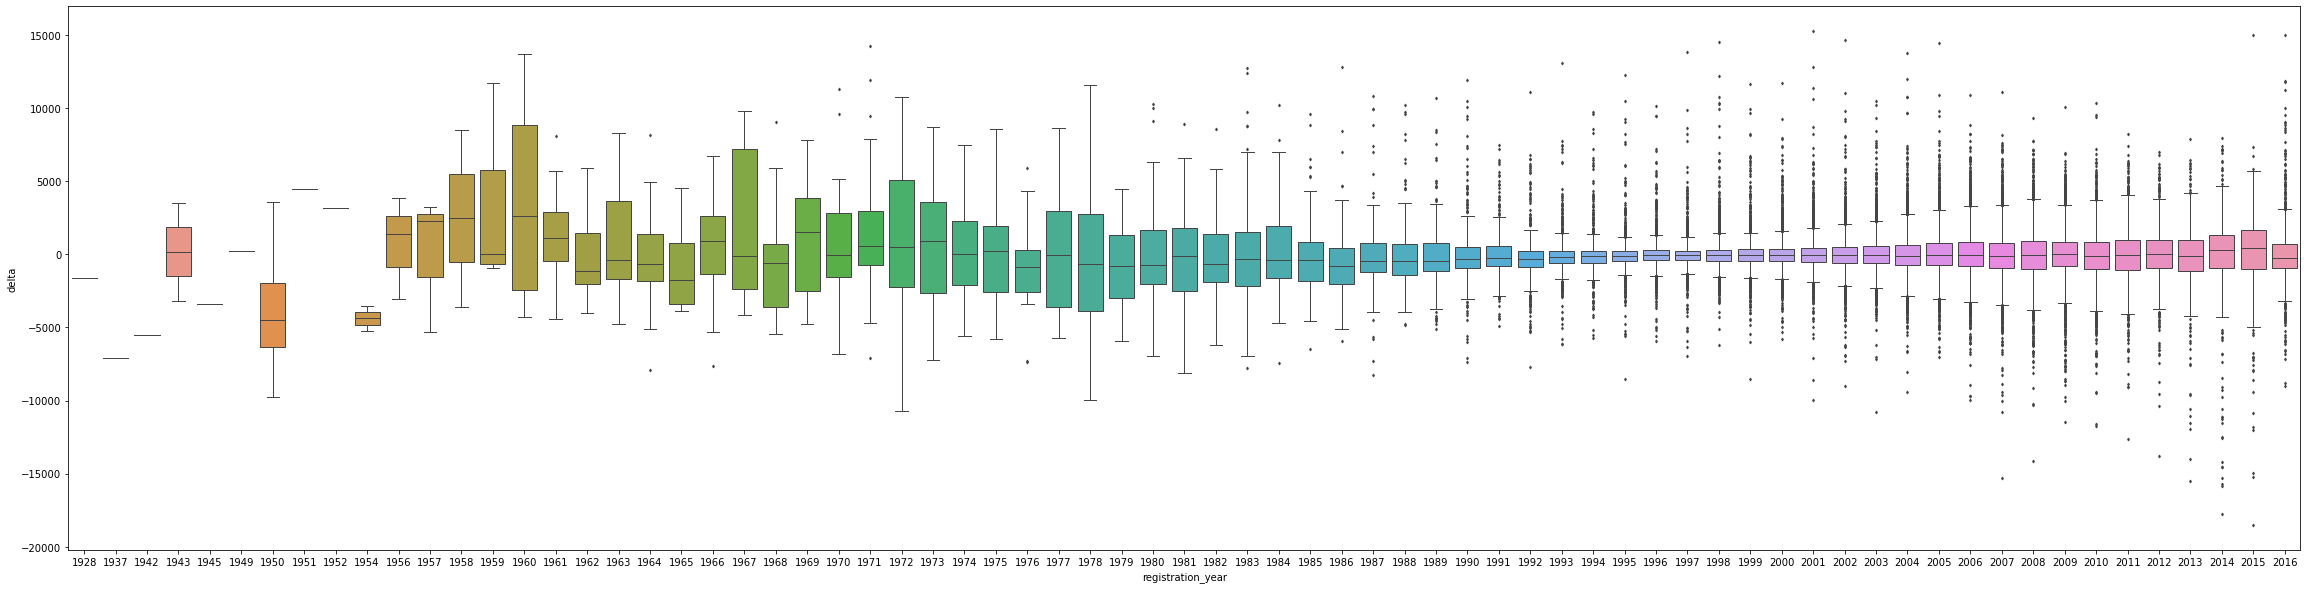

In [92]:
plt.figure(figsize=(40,10))
ax = sns.boxplot(x='registration_year',y='delta',data=features_valid,linewidth=1,fliersize=2)
plt.show()

разброс значений ошибок относительно года регистрации лихих 90-х и начала 2000-х как будто меньше (меньше разница между первым и третьим квантилями). Предположу, что, все дело в том что, колличество машин первой половины 20-го века просто меньше и из за этого страдает "нормальность" распределения.

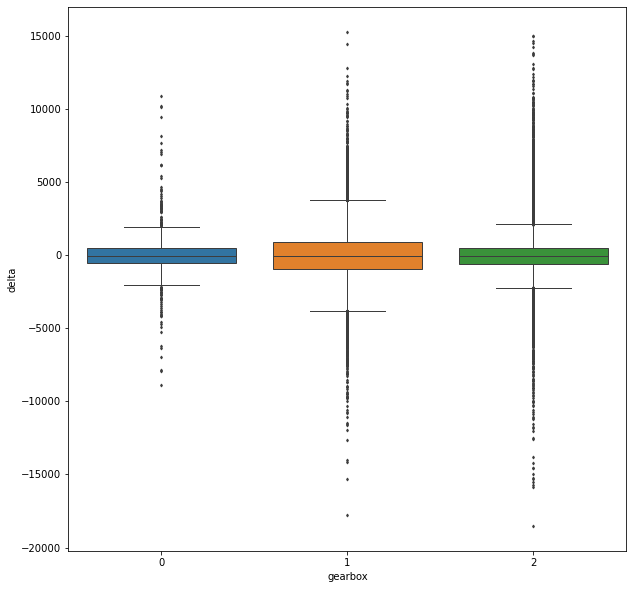

In [93]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='gearbox',y='delta',data=features_valid,linewidth=1,fliersize=2)
plt.show()

тут все примерно одинаково

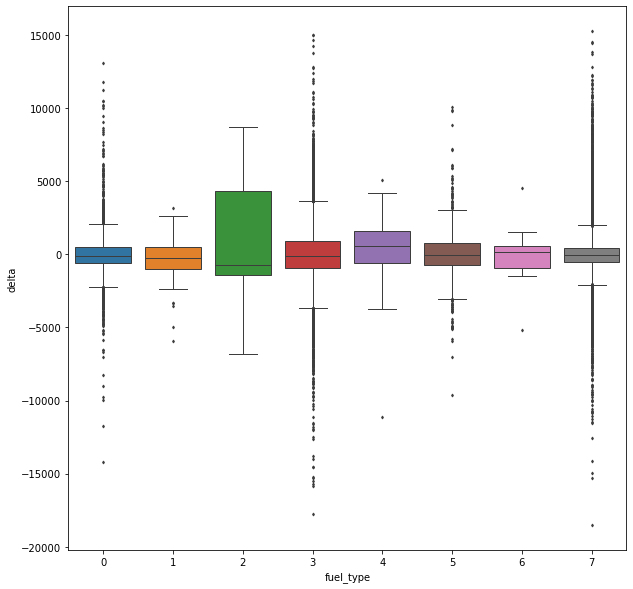

In [94]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='fuel_type',y='delta',data=features_valid,linewidth=1,fliersize=2)
plt.show()

По типу топлива:
2-й тип топлива имеет очень большое межквартильное расстояние + отсутствие выбросов.

0, 3 и 7 типы топлива имеют большое кол-во выбросов.

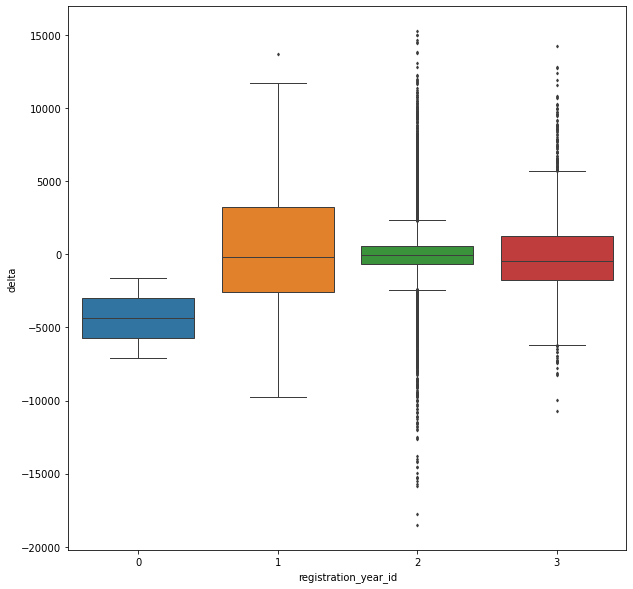

In [95]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='registration_year_id',y='delta',data=features_valid,linewidth=1,fliersize=2)
plt.show()

И наконец наш сгенерированный признак! Тут медиана 1, 2 и 3 значений примерно равны. 

Ошибка у авто с нулевым классом года регистрации выше!!

In [96]:
features_valid = features_valid.drop('delta', axis = 1)

### обучим модель RandomForestRegressor

In [97]:
model_rand_for_reg = RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=15)

In [98]:
start_time = time.time()

model_rand_for_reg.fit(features_train, target_train)

time_value.append(time.time() - start_time)
model.append('RandomForestRegressor')

In [99]:
pred_valid = model_rand_for_reg.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5

RMSE_value.append(RMSE)

RMSE

1614.6587787863089

### обучим модель LinearRegression

In [100]:
start_time = time.time()

model_L = GridSearchCV(LinearRegression(),param_grid={},cv=5,n_jobs=-1)
model_L.fit(features_train, target_train)

pred_valid = model_L.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5

time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('LinearRegression')

print(RMSE)

3308.0958655736226


### обучим модель KNeighborsRegressor

In [101]:
start_time = time.time()

model_gs_knn = GridSearchCV(KNeighborsRegressor(weights = 'distance', n_neighbors = 7, p = 1),param_grid={},cv=3)
model_gs_knn.fit(features_train, target_train)

pred_valid = model_gs_knn.predict(features_valid)
RMSE = mean_squared_error(target_valid, pred_valid)**0.5

time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('KNeighborsRegressor')

RMSE

1819.1339689294084

### обучим константную модель DummyRegressor

In [102]:
start_time = time.time()

dc = DummyRegressor()
model_dc = dc.fit(features_train, target_train)
dummy_pred = model_dc.predict(features_valid)
RMSE = mean_squared_error(target_valid, dummy_pred)**0.5

time_value.append(time.time() - start_time)
RMSE_value.append(RMSE)
model.append('DummyRegressor')

RMSE

4645.745233113019

Преобразуем результаты в табличку

In [103]:
model = pd.Series(model)
RMSE_value = pd.Series(RMSE_value)
time_value = pd.Series(time_value)

res = pd.DataFrame({'model':model,'RMSE_value':RMSE_value,'time_value':time_value})

In [104]:
res

,model,RMSE_value,time_value
0,CatBoostRegressor + features,1585.649004,184.734264
1,XGBRegressor,1495.911800,53.172943
2,LGBMModel + features,1523.198886,20.435636
3,RandomForestRegressor,1614.658779,21.368086
4,LinearRegression,3308.095866,2.038967
5,KNeighborsRegressor,1819.133969,110.596575
6,DummyRegressor,4645.745233,0.002001


## Выводы: 

самая точная модель оказалась: XGBRegressor 

Самое оптимальное соотношение точности и скорости показал LGBMModel
 
Так же неплохо показавшие себя модели : 
 - CatBoostRegressor 
 - RandomForestRegressor
 
Не оправдавшие себя/медленные модели : LinearRegressor, KNeighborsRegressor
По сравнению с константной моделью DummyRegressor, все модели лучше.